In [119]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [10]:
# Load data

ma_data = pd.read_csv('../data/priceisyourright/CHAI_MA-cost-estimates.csv')
nh_data = pd.read_csv('../data/priceisyourright/NHID_cost-estimates.csv')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,7,47,48,49,51,52,53,55,56,57) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
len(ma_data)

113813

In [12]:
len(nh_data)

67809

In [92]:
nh_data.columns.tolist()

['PROCEDURE_CODE',
 'PROCEDURE_NAME',
 'SHORT_DESCRIPTION',
 'CATEGORY_NAME',
 'COVERAGE_CLASS',
 ' MED_ALLOW ',
 'PRICE_PERCISION',
 'PATIENT_COMPLEXITY',
 'PAYER',
 'PLAN_TYPE',
 'PROVIDER_NAME',
 'ADDRESS1',
 'CITY1',
 'STATE1',
 'ZIP1',
 'ADDRESS2',
 'CITY2',
 'STATE2',
 'ZIP2',
 'ADDRESS3',
 'CITY3',
 'STATE3',
 'ZIP3',
 'ADDRESS4',
 'CITY4',
 'STATE4',
 'ZIP4',
 'ADDRESS5',
 'CITY5',
 'STATE5',
 'ZIP5',
 'ADDRESS6',
 'CITY6',
 'STATE6',
 'ZIP6',
 'ADDRESS7',
 'CITY7',
 'STATE7',
 'ZIP7',
 'ADDRESS8',
 'CITY8',
 'STATE8',
 'ZIP8',
 'ADDRESS9',
 'CITY9',
 'STATE9',
 'ZIP9',
 'ADDRESS10',
 'CITY10',
 'STATE10',
 'ZIP10',
 'ADDRESS11',
 'CITY11',
 'STATE11',
 'ZIP11',
 'ADDRESS12',
 'CITY12',
 'STATE12',
 'ZIP13',
 'WEBSITE']

In [14]:
ma_data.columns.tolist()

['ProviderNPI',
 'ProviderName',
 'ProviderName_Additional',
 'ProviderOrgName_Anchored',
 'ProviderOrgNPI_Anchored',
 'ProviderTaxonomyType',
 'ProviderTaxonomyGroup',
 'ProviderTaxonomyGroupDetail',
 'TAXONOMYCODE',
 'ProviderAddress',
 'PracticeState',
 'ZIP',
 'ServiceCode',
 'CostEstimate',
 'NumberServices',
 'ServiceType_Level1',
 'ServiceType_Level2',
 'ServiceType_Level3',
 'ServiceType_Level4',
 'ServiceDescription',
 'NumberProvs_forPayerAndService',
 'NumberServices_All',
 'TotalCost_All']

In [23]:
pd.set_option('display.max_columns', None)

In [26]:
ma_data.sample(frac=1).head(20)

,ProviderNPI,ProviderName,ProviderName_Additional,ProviderOrgName_Anchored,ProviderOrgNPI_Anchored,ProviderTaxonomyType,ProviderTaxonomyGroup,ProviderTaxonomyGroupDetail,TAXONOMYCODE,ProviderAddress,PracticeState,ZIP,ServiceCode,CostEstimate,NumberServices,ServiceType_Level1,ServiceType_Level2,ServiceType_Level3,ServiceType_Level4,ServiceDescription,NumberProvs_forPayerAndService,NumberServices_All,TotalCost_All
108254,1194985846,Dhrumil M Shah M.D.,"Steward Medical Group, Inc","Steward Medical Group, Inc",1255600300,Physician: Family Medicine,Physician,Family Medicine Practioner,207Q00000X,1 Compass Way Suite 210 East Bridgewater MA 02333,MA,2333,99396,208.93,163,Office Visits,Preventive care,Established patient,Age 40 to 64,"Established patient periodic preventive medicine examination, age 40 through 64 years",4289,214,47124.82
19278,1235129842,Kaaren Elizabeth Bekken PhD,NaN,Kaaren Elizabeth Bekken PhD,1235129842,Psychologist,Behavioral Health Specialist,Psychologist,103T00000X,125 Nashua St SRH Spaulding Rehab Hospital Boston MA 02114,MA,2114,90791,159.34,32,Behavioral Health,Testing and Evaluation,Diagnostic evaluation,NaN,Psychiatric diagnostic evaluation,2948,32,4505.93
16142,1174569909,Quest Diagnostics LLC,NaN,Quest Diagnostics LLC,1174569909,Clinical Medical Laboratory,Medical Lab,Medical Lab,291U00000X,3 Sterling Dr Wallingford CT 06492,CT,6492,87186,10.62,64,Laboratory and Pathology Testing,Swab tests,"Evaluation of antimicrobial drug (antibiotic, antifungal, antiviral)",NaN,Evaluation of effectiveness of particular drug to stop growth of bacteria or fungi,112,64,766.62
106555,1508872359,Andrew K Fay MD,"Baystate Medical Practices, Inc","Baystate Medical Practices, Inc",1548205909,Physician: Internal Medicine,Internal Medicine,Internal Medicine,207R00000X,470 Granby Rd South Hadley MA 01075,MA,1075,99395,159.19,56,Office Visits,Preventive care,Established patient,Age 18 to 39,"Established patient periodic preventive medicine examination, age 18 through 39 years",4070,79,13997.40
97875,1124085212,Linda G Degeus MD,"Tri-County Medical Associates, Inc.","Tri-County Medical Associates, Inc.",1902856024,Physician: Pediatrics,Pediatrician,Pediatrician,208000000X,835 West Central Street Franklin MA 02038,MA,2038,99381,253.69,32,Office Visits,Preventive care,New patient,Age 0 to 1,Initial new patient preventive medicine evaluation infant younger than 1 year,245,37,9071.94
14784,1972590552,Coastal Medical Lab,NaN,Coastal Medical Lab,1972590552,Clinical Medical Laboratory,Medical Lab,Medical Lab,291U00000X,272 W Exchange St Suite 100 Providence RI 02903,RI,2903,86618,20.15,44,Laboratory and Pathology Testing,Blood Tests,Lyme disease bacteria (blood test),NaN,Analysis for Lyme disease bacteria,110,44,880.62
24416,1265470124,Susan P O'Neil LICSW,NaN,Susan P O'Neil LICSW,1265470124,Social Worker,Social Worker,Social Worker,1041C0700X,99 Church St Lowell MA 01852,MA,1852,90834,76.23,137,Behavioral Health,Psychotherapy,45 minutes,NaN,Psychotherapy with patient and/or family member - 45 minutes,9226,137,9896.02
77322,1457308249,Shahnaz Montague M.D.,NaN,Shahnaz Montague M.D.,1457308249,Physician: Internal Medicine,Internal Medicine,Internal Medicine,207R00000X,3 Franklin Commons Framingham MA 01702,MA,1702,99213,135.52,208,Office Visits,Presenting with a problem,Established patient,15 minutes,"Established patient office or other outpatient visit, 15 minutes",15090,239,30944.90
76275,1851388029,Joseph P Kagan MD,"Steward Medical Group, Inc","Steward Medical Group, Inc",1629398219,Physician: Internal Medicine,Internal Medicine,Internal Medicine,207R00000X,1 Pearl St Suite 2100 Brockton MA 02301,MA,2301,99213,130.17,198,Office Visits,Presenting with a problem,Established patient,15 minutes,"Established patient office or other outpatient visit, 15 minutes",15090,292,38585.09
3030,1598053472,Morton Hospital,NaN,Morton Hospital,1598053472,General Acute Care Hospital,Acute Hospital,Acute Hospital,282N00000X,88 Washington St Taunton MA 02

In [96]:
ma_data_slim = ma_data[['ProviderOrgName_Anchored', 'ProviderTaxonomyType', 'ProviderTaxonomyGroup',  'ZIP',
 'ServiceCode',
 'CostEstimate',
 'NumberServices',
 'ServiceType_Level1',
 'ServiceType_Level2',
 'ServiceType_Level3',
 'ServiceType_Level4',
 'ServiceDescription',
 'NumberProvs_forPayerAndService',
 'NumberServices_All',
 'TotalCost_All']].sample(frac=1)

In [95]:
nh_data_slim = nh_data[['PROCEDURE_CODE',
 'PROCEDURE_NAME',
 'SHORT_DESCRIPTION',
 'CATEGORY_NAME',
 'COVERAGE_CLASS',
 ' MED_ALLOW ',
 'PRICE_PERCISION',
 'PATIENT_COMPLEXITY',
 'PAYER',
 'PLAN_TYPE',
 'PROVIDER_NAME']].sample(frac=1)

## TODO:

- create groupings for services rendered 
- give the conditional probability of multiple procedures being accounted for
- give a cost estimate for the procedures given a users insurance / location
- suggest the top 3 recommendations based on the criteria

In [97]:
nh_data_slim

,PROCEDURE_CODE,PROCEDURE_NAME,SHORT_DESCRIPTION,CATEGORY_NAME,COVERAGE_CLASS,MED_ALLOW,PRICE_PERCISION,PATIENT_COMPLEXITY,PAYER,PLAN_TYPE,PROVIDER_NAME
22442,97140,Manual Therapy - PT,Manual Therapy - PT,Physical Therapy,MED,$36,HIGH,NaN,Harvard Pilgrim HC,Individual (self-purchased) Medical Plans,ADAMS PHYSICAL THERAPY AND SPORTS REHABILITATION
58205,D2150,"Silver (Amalgam) Dental Filling - Two surfaces, primary or permanent","Silver (Amalgam) Dental Filling - Two surfaces, primary or permanent",Dental Fillings,DEN,$197,VERY LOW,NaN,Metropolitan Life,All Dental Plans,BARRY F. MCARDLE GENERAL DENTIST
26904,99203,"Office Visit, New Pt, Low",Office Visit for a New Patient with low complexity medical issues,Office Visits,MED,$238,LOW,NaN,Anthem - NH,Individual (self-purchased) Medical Plans,DARTMOUTH-HITCHCOCK (CONCORD)
4828,78452,Myocardial Imaging (outpatient),"Myocardial perfusion imaging, at rest or with stress, tomographic with multiple studies.",Radiology Services,MED,"$3,858",MEDIUM,MEDIUM,Harvard Pilgrim HC,Group (employer) Medical Plans,MEMORIAL HOSPITAL
45837,D0220,X-Ray Dental - Intraoral - periapical radiographic image,X-Ray Dental - Intraoral - periapical radiographic image,Diagnostic Services,DEN,$37,LOW,NaN,Aetna,All Dental Plans,HAMPSTEAD FAMILY DENTAL
19877,97014,Electrical Stimulation Therapy - PT,Electrical Stimulation Therapy - PT,Physical Therapy,MED,$7,HIGH,NaN,Harvard Pilgrim HC,Individual (self-purchased) Medical Plans,"MATTHEW HOTZ, DC"
31573,99381,"New Patient, Comp Prevent Medicine younger than 1 yrs old",First Comprehensive Preventative Medical office visit for patient younger than 1 yrs old,Office Visits,MED,$195,LOW,NaN,Cigna,Group (employer) Medical Plans,ELLIOT PHYSICIAN NETWORK
36529,99396,Comp Preventive Medicine 40-64 yrs old,"Periodic comprehensive preventive medicine evaluation, history, exam, risk factor reduction, immunizations, lab work, 40-64 yrs old.",Office Visits,MED,$246,HIGH,NaN,Harvard Pilgrim HC,Individual (self-purchased) Medical Plans,MID-STATE HEALTH CENTER
43340,D0150,Comprehensive Dental Exam,Comprehensive Dental Exam,Diagnostic Services,DEN,$97,MEDIUM,NaN,Cigna,All Dental Plans,PARSIO-OSORIO DENTAL
39908,D0120,Periodic dental exam - established patient,Periodic dental exam - established patient,Diagnostic Services,DEN,$49,LOW,NaN,Cigna,All Dental Plans,"MARINA E BECKER, DMD"


In [98]:
nh_data_slim.CATEGORY_NAME.value_counts()

Diagnostic Services                12265
Office Visits                      11074
Dental Fillings                    8418 
Laboratory Services                7410 
Behavioral Health Care             7233 
Preventive Care                    6219 
Physical Therapy                   4963 
Radiology Services                 3459 
Other Dental Services              1755 
Ambulance Services                 1625 
Outpatient Tests and Procedures    1378 
Chiropractic Care                  1377 
Emergency Visits                   511  
Orthodontic Services               122  
Name: CATEGORY_NAME, dtype: int64

In [111]:
sorted([str(x) for x in nh_data_slim.PROCEDURE_CODE.unique().tolist()])

['11100',
 '17000',
 '17110',
 '19081',
 '20610',
 '29826',
 '29881',
 '31231',
 '31575',
 '42820',
 '43235',
 '43239',
 '45378',
 '45380',
 '45385',
 '47562',
 '49650',
 '50590',
 '51798',
 '52000',
 '58100',
 '59025',
 '70450',
 '70553',
 '71020',
 '71260',
 '72040',
 '72070',
 '72100',
 '72148',
 '72170',
 '72197',
 '73030',
 '73110',
 '73130',
 '73221',
 '73502',
 '73562',
 '73610',
 '73630',
 '73721',
 '74000',
 '74177',
 '76536',
 '76642',
 '76700',
 '76705',
 '76805',
 '76816',
 '76830',
 '76856',
 '77067',
 '77080',
 '78452',
 '80048',
 '80050',
 '80051',
 '80053',
 '80055',
 '80061',
 '80069',
 '80076',
 '81001',
 '81003',
 '81025',
 '82306',
 '82607',
 '83036',
 '84153',
 '84439',
 '84443',
 '85025',
 '85027',
 '85610',
 '87081',
 '87086',
 '87491',
 '87591',
 '87880',
 '88175',
 '90791',
 '90832',
 '90834',
 '90837',
 '90847',
 '90853',
 '97014',
 '97035',
 '97110',
 '97112',
 '97140',
 '97161',
 '97162',
 '97163',
 '97164',
 '97530',
 '98941',
 '98942',
 '99202',
 '99203',


In [110]:
sorted([str(y) for y in ma_data_slim.ServiceCode.unique().tolist()])

['43239',
 '43239 w/ Colonoscopy',
 '43239 w/ polyp removal',
 '45378',
 '45378 w/ Endoscopy',
 '45380',
 '45380 w/ Endoscopy',
 '45380 w/ polyp removal',
 '59400',
 '59510',
 '70336',
 '70450',
 '70460',
 '70470',
 '70480',
 '70481',
 '70486',
 '70487',
 '70490',
 '70491',
 '70496',
 '70498',
 '70540',
 '70543',
 '70544',
 '70546',
 '70547',
 '70548',
 '70549',
 '70551',
 '70553',
 '71020',
 '71250',
 '71260',
 '71270',
 '71275',
 '71550',
 '71552',
 '71555',
 '72010',
 '72100',
 '72125',
 '72128',
 '72129',
 '72131',
 '72132',
 '72141',
 '72146',
 '72148',
 '72156',
 '72157',
 '72158',
 '72192',
 '72193',
 '72195',
 '72197',
 '72198',
 '73030',
 '73110',
 '73120',
 '73200',
 '73201',
 '73218',
 '73220',
 '73221',
 '73222',
 '73223',
 '73562',
 '73610',
 '73620',
 '73630',
 '73700',
 '73701',
 '73718',
 '73720',
 '73721',
 '73722',
 '73723',
 '73725',
 '74150',
 '74160',
 '74170',
 '74174',
 '74175',
 '74176',
 '74177',
 '74178',
 '74181',
 '74183',
 '74183 w/ 72197',
 '74185',
 '7557

In [114]:
nh_data_slim.loc[nh_data_slim.PROCEDURE_CODE == 70450]

,PROCEDURE_CODE,PROCEDURE_NAME,SHORT_DESCRIPTION,CATEGORY_NAME,COVERAGE_CLASS,MED_ALLOW,PRICE_PERCISION,PATIENT_COMPLEXITY,PAYER,PLAN_TYPE,PROVIDER_NAME
1470,70450,"CT - Head/Brain, without dye","CT - Head/Brain, without dye",Radiology Services,MED,$531,MEDIUM,HIGH,Anthem - NH,Individual (self-purchased) Medical Plans,MARY HITCHCOCK MEMORIAL HOSPITAL
1489,70450,"CT - Head/Brain, without dye","CT - Head/Brain, without dye",Radiology Services,MED,$359,LOW,MEDIUM,Harvard Pilgrim HC,Group (employer) Medical Plans,LAWRENCE GENERAL HOSPITAL
1498,70450,"CT - Head/Brain, without dye","CT - Head/Brain, without dye",Radiology Services,MED,"$1,048",LOW,MEDIUM,Cigna,Group (employer) Medical Plans,CHESHIRE MEDICAL CENTER
1492,70450,"CT - Head/Brain, without dye","CT - Head/Brain, without dye",Radiology Services,MED,"$1,936",HIGH,HIGH,Other Medical Insurance,Group (employer) Medical Plans,PORTSMOUTH REGIONAL HOSPITAL
1471,70450,"CT - Head/Brain, without dye","CT - Head/Brain, without dye",Radiology Services,MED,"$1,097",MEDIUM,HIGH,Cigna,Group (employer) Medical Plans,MARY HITCHCOCK MEMORIAL HOSPITAL
1484,70450,"CT - Head/Brain, without dye","CT - Head/Brain, without dye",Radiology Services,MED,$273,LOW,MEDIUM,Anthem - NH,Individual (self-purchased) Medical Plans,EXETER HOSPITAL
1500,70450,"CT - Head/Brain, without dye","CT - Head/Brain, without dye",Radiology Services,MED,$616,LOW,HIGH,Harvard Pilgrim HC,Group (employer) Medical Plans,LAKES REGION GENERAL HEALTHCARE
1491,70450,"CT - Head/Brain, without dye","CT - Head/Brain, without dye",Radiology Services,MED,"$1,766",MEDIUM,HIGH,Harvard Pilgrim HC,Group (employer) Medical Plans,PORTSMOUTH REGIONAL HOSPITAL
1495,70450,"CT - Head/Brain, without dye","CT - Head/Brain, without dye",Radiology Services,MED,$597,HIGH,MEDIUM,Harvard Pilgrim HC,Group (employer) Medical Plans,SOUTHERN NH MEDICAL CENTER
1472,70450,"CT - Head/Brain, without dye","CT - Head/Brain, without dye",Radiology Services,MED,"$1,635",MEDIUM,HIGH,Harvard Pilgrim HC,Group (employer) Medical Plans,MARY HITCHCOCK MEMORIAL HOSPITAL


In [113]:
ma_data_slim.loc[ma_data_slim.ServiceCode == '70450']

,ProviderOrgName_Anchored,ProviderTaxonomyType,ProviderTaxonomyGroup,ZIP,ServiceCode,CostEstimate,NumberServices,ServiceType_Level1,ServiceType_Level2,ServiceType_Level3,ServiceType_Level4,ServiceDescription,NumberProvs_forPayerAndService,NumberServices_All,TotalCost_All
1361,Signature Healthcare Brockton Hospital,General Acute Care Hospital,Acute Hospital,2302,70450,369.67,476,Radiology,CT Scan,Head or brain,Without contrast,"CT scan of head or brain, diagnostic, without contrast material",105,476,141953.04
1298,"Harbor Medical Associates, P.C.",Multi-Specialty Organization,Multi-Specialty Organization,2190,70450,225.53,98,Radiology,CT Scan,Head or brain,Without contrast,"CT scan of head or brain, diagnostic, without contrast material",105,98,22717.43
1326,Harvard Vanguard Medical Associates,Multi-Specialty Organization,Multi-Specialty Organization,2215,70450,288.80,40,Radiology,CT Scan,Head or brain,Without contrast,"CT scan of head or brain, diagnostic, without contrast material",105,40,10738.33
1376,"Berkshire Medical Center, Inc",General Acute Care Hospital,Acute Hospital,1201,70450,690.26,413,Radiology,CT Scan,Head or brain,Without contrast,"CT scan of head or brain, diagnostic, without contrast material",105,413,269897.95
1348,"Steward Holy Family Hospital, Inc.",General Acute Care Hospital,Acute Hospital,1844,70450,401.54,532,Radiology,CT Scan,Head or brain,Without contrast,"CT scan of head or brain, diagnostic, without contrast material",105,532,201367.56
1288,"Steward Carney Hospital, Inc.",General Acute Care Hospital,Acute Hospital,2124,70450,334.10,228,Radiology,CT Scan,Head or brain,Without contrast,"CT scan of head or brain, diagnostic, without contrast material",105,228,72355.87
1377,St. Luke's Hospital,General Acute Care Hospital,Acute Hospital,2740,70450,331.43,516,Radiology,CT Scan,Head or brain,Without contrast,"CT scan of head or brain, diagnostic, without contrast material",105,516,167867.34
1329,"Prima Care, PC",Clinic/Center,Clinic,2721,70450,312.97,168,Radiology,CT Scan,Head or brain,Without contrast,"CT scan of head or brain, diagnostic, without contrast material",105,168,50331.36
1335,Baystate Wing Hospital & Medical Centers,General Acute Care Hospital,Acute Hospital,1069,70450,451.73,125,Radiology,CT Scan,Head or brain,Without contrast,"CT scan of head or brain, diagnostic, without contrast material",105,125,48812.94
1345,North Shore Medical Center Inc,General Acute Care Hospital,Acute Hospital,1970,70450,419.25,563,Radiology,CT Scan,Head or brain,Without contrast,"CT scan of head or brain, diagnostic, without contrast material",105,563,208032.19


In [121]:
nh_data_slim[['PROCEDURE_CODE', 'PROCEDURE_NAME']]

,PROCEDURE_CODE,PROCEDURE_NAME
22442,97140,Manual Therapy - PT
58205,D2150,"Silver (Amalgam) Dental Filling - Two surfaces, primary or permanent"
26904,99203,"Office Visit, New Pt, Low"
4828,78452,Myocardial Imaging (outpatient)
45837,D0220,X-Ray Dental - Intraoral - periapical radiographic image
19877,97014,Electrical Stimulation Therapy - PT
31573,99381,"New Patient, Comp Prevent Medicine younger than 1 yrs old"
36529,99396,Comp Preventive Medicine 40-64 yrs old
43340,D0150,Comprehensive Dental Exam
39908,D0120,Periodic dental exam - established patient


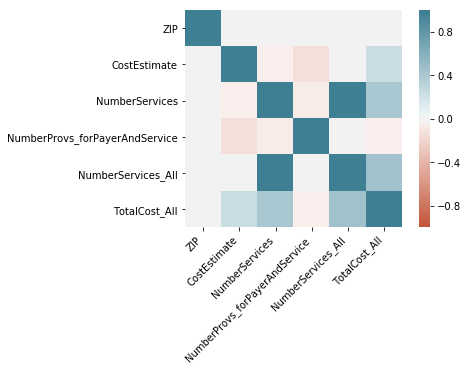

In [120]:
corr = ma_data_slim.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [137]:
ma_data_slim.groupby('ProviderOrgName_Anchored')[['ServiceCode', 'CostEstimate']].agg({'ServiceCode': lambda x: list(x), 'CostEstimate': ['sum', 'mean', 'median']})

ServiceCode  \
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  <lambda>   
ProviderOrgName_Anchored                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
1 On 1 Eyecare                                           [92004, 92014]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
2 Thumbs Up Hand Therapy LLC                             [97003, 97530, 97110, 97112, 97140, 97140, 97004, 97003, 97112, 97003, 97530, 97110, 97140, 97004, 97110, 97110, 97112]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
20 20 Eye Care PC                                        [92004, 92014, 92012, 99213, 92002]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
60 Quaker Highway Inc.                                   [97112, 97002, 97530, 97001, 97140, 97110]                                                        

In [138]:
ma_data_slim.groupby('ServiceCode')[['ProviderOrgName_Anchored', 'CostEstimate']].agg({'ProviderOrgName_Anchored': lambda x: list(x), 'CostEstimate': ['sum', 'mean', 'median']})

ProviderOrgName_Anchored  \
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         <lambda>   
ServiceCode                                                                                                                    

In [117]:
ma_data_slim.ServiceType_Level1.value_counts()

Office Visits                        61905
Behavioral Health                    17815
Physical and Occupational Therapy    11109
Laboratory and Pathology Testing     10378
Radiology                            6342 
Eye exams                            3499 
Ambulance/Transportation Services    949  
Colonoscopy and Endoscopy            706  
Maternity                            684  
Emergency Department Visits          426  
Name: ServiceType_Level1, dtype: int64

In [60]:
ma_data.loc[ma_data.ProviderName == 'Kaaren Elizabeth Bekken PhD']

,ProviderNPI,ProviderName,ProviderName_Additional,ProviderOrgName_Anchored,ProviderOrgNPI_Anchored,ProviderTaxonomyType,ProviderTaxonomyGroup,ProviderTaxonomyGroupDetail,TAXONOMYCODE,ProviderAddress,PracticeState,ZIP,ServiceCode,CostEstimate,NumberServices,ServiceType_Level1,ServiceType_Level2,ServiceType_Level3,ServiceType_Level4,ServiceDescription,NumberProvs_forPayerAndService,NumberServices_All,TotalCost_All
19278,1235129842,Kaaren Elizabeth Bekken PhD,NaN,Kaaren Elizabeth Bekken PhD,1235129842,Psychologist,Behavioral Health Specialist,Psychologist,103T00000X,125 Nashua St SRH Spaulding Rehab Hospital Boston MA 02114,MA,2114,90791,159.34,32,Behavioral Health,Testing and Evaluation,Diagnostic evaluation,NaN,Psychiatric diagnostic evaluation,2948,32,4505.93
38765,1235129842,Kaaren Elizabeth Bekken PhD,NaN,Kaaren Elizabeth Bekken PhD,1235129842,Psychologist,Behavioral Health Specialist,Psychologist,103T00000X,125 Nashua St SRH Spaulding Rehab Hospital Boston MA 02114,MA,2114,96118,112.52,23,Behavioral Health,Testing and Evaluation,Neuropsychological testing - Per hour,Administered by psychologist or therapist,Neuropsychological testing by technician with interpretation and report by a qualified healthcare professional per hour,161,23,28358.72


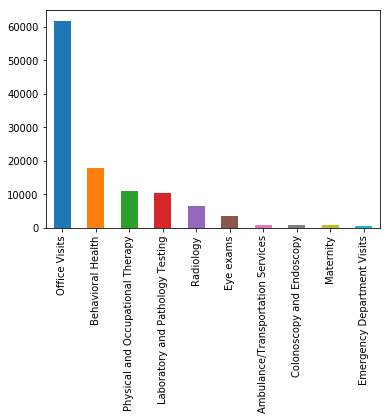

In [81]:
ma_data_slim['ServiceType_Level1'].value_counts().plot(kind='bar')

In [83]:
ma_data_slim.loc[ma_data_slim.ServiceType_Level1 == 'Emergency Department Visits']['ServiceType_Level2'].value_counts()

Moderate severity problems                         114
High severity but non-life-threatening problems    96 
Low to moderate severity problems                  85 
Life-threatening problems                          74 
Minor problems                                     57 
Name: ServiceType_Level2, dtype: int64

In [84]:
ma_data_slim.loc[ma_data_slim.ServiceType_Level1 == 'Emergency Department Visits']['ServiceType_Level3'].value_counts()

Series([], Name: ServiceType_Level3, dtype: int64)

In [86]:
ma_data_slim.loc[ma_data_slim.ServiceType_Level1 == 'Emergency Department Visits']['ServiceType_Level4'].value_counts()

Series([], Name: ServiceType_Level4, dtype: int64)

In [88]:
ma_data_slim.loc[ma_data_slim.ServiceType_Level1 == 'Office Visits']['ServiceType_Level2'].value_counts()

Presenting with a problem    45763
Preventive care              14537
Consultation                 1605 
Name: ServiceType_Level2, dtype: int64

In [90]:
ma_data_slim.loc[ma_data_slim.ServiceType_Level1 == 'Office Visits']['ServiceType_Level3'].value_counts()

Established patient    47788
New patient            12512
60 minutes             751  
40 minutes             611  
80 minutes             132  
30 minutes             99   
15 minutes             12   
Name: ServiceType_Level3, dtype: int64

In [91]:
ma_data_slim.loc[ma_data_slim.ServiceType_Level1 == 'Office Visits']['ServiceType_Level4'].value_counts()

15 minutes         15090
25 minutes         12994
Age 18 to 39       5107 
Age 40 to 64       4807 
30 minutes         4291 
10 minutes         4007 
45 minutes         3626 
40 minutes         2381 
20 minutes         1433 
Age 0 to 1         1187 
60 minutes         1177 
Age 5 to 11        1114 
Age 12 to 17       1045 
Age 1 to 4         840  
5 minutes          764  
Age 65 or older    437  
Name: ServiceType_Level4, dtype: int64